In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid-19-data/us-states.csv")

In [3]:
illinois_bool = df["state"]=="Illinois"

In [4]:
illinois = df[illinois_bool]

In [5]:
illinois_firstDeath = illinois["deaths"] > 0

In [6]:
illinois_firstDeath = illinois[illinois_firstDeath]

In [7]:
print("-------------------------------------------------------------------------")
total_deaths = illinois[-1:]
print("Yesterday's numbers\n\n" + str(total_deaths))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Yesterday's numbers

            date     state  fips  cases  deaths
2232  2020-04-12  Illinois    17  20852     727
-------------------------------------------------------------------------


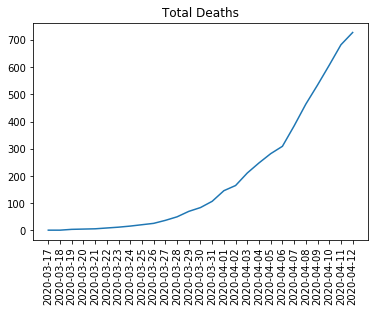

In [8]:
plt.xticks(rotation="90")
plt.title("Total Deaths")
plt.plot(illinois_firstDeath["date"], illinois_firstDeath["deaths"])

<h4>Plot the number of cases from when the number of cases were greather than 50</h4>

In [9]:
illinois_firstCase = illinois["cases"]>50

In [10]:
illinois_firstCase = illinois[illinois_firstCase]


Total number of cases


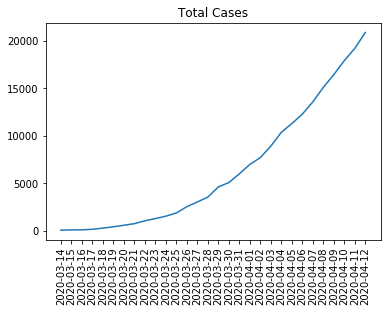

In [11]:
print("\nTotal number of cases")
plt.xticks(rotation = "90")
plt.title("Total Cases")
plt.plot(illinois_firstCase["date"], illinois_firstCase["cases"])

<h4>Get date of largest increase in death</h4>

In [12]:
print("-------------------------------------------------------------------------")
i = 0
max_deaths = 0
diff = 0
for index, row in illinois.iterrows():
    if i != 0 and illinois.loc[index, "deaths"] != 0:
        diff = illinois.loc[index, "deaths"] - illinois.loc[prev_index, "deaths"]
        if (diff >= max_deaths):
            if (diff == max_deaths):
                max_date = str(max_date) + ", " + str(illinois.loc[index, "date"])
            else:
                max_date = illinois.loc[index, "date"]
            max_deaths = diff
            
    if illinois.loc[index, "deaths"] != 0 or i == 0:
        prev_index = index
    i = i + 1
print("\nMax deaths in one day: " + str(max_deaths))
print("\nDate of max deaths: " + str(max_date)+"\n")
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------

Max deaths in one day: 80

Date of max deaths: 2020-04-08

-------------------------------------------------------------------------


<h4>Get the past week's numbers</h4>

In [13]:
print("\n-------------------------------------------------------------------------")
print("The past week's numbers\n")
print(illinois[-7:])
print("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
The past week's numbers

            date     state  fips  cases  deaths
1898  2020-04-06  Illinois    17  12262     309
1953  2020-04-07  Illinois    17  13549     384
2008  2020-04-08  Illinois    17  15078     464
2064  2020-04-09  Illinois    17  16422     534
2120  2020-04-10  Illinois    17  17887     607
2176  2020-04-11  Illinois    17  19180     682
2232  2020-04-12  Illinois    17  20852     727
-------------------------------------------------------------------------


<h4>Total deaths overnight</h4>

In [14]:
print("-------------------------------------------------------------------------")
total_overnight_deaths = illinois.iloc[-1]["deaths"] - illinois.iloc[-2]["deaths"]
print("Total overnight deaths = " + str(total_overnight_deaths))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Total overnight deaths = 45
-------------------------------------------------------------------------


<h4>Total cases overnight</h4>

In [16]:
print("-------------------------------------------------------------------------")
total_overnight_cases = illinois.iloc[-1]["cases"] - illinois.iloc[-2]["cases"]
print("Total overnight cases = " + str(total_overnight_cases))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Total overnight cases = 1672
-------------------------------------------------------------------------


In [15]:
# Get daily numbers 

# create dictinary where key is date and value is dict in that dict
# the key is either "deaths" or "cases" and the value is its respective value
numbers = {}
i = 0
for index, row in illinois.iterrows():
    if i != 0 and illinois.loc[index, "deaths"] != 0 and illinois.loc[index, "cases"] != 0:
        cases  = illinois.loc[index, "cases"] - illinois.loc[prev_index, "cases"]
        deaths  = illinois.loc[index, "deaths"] - illinois.loc[prev_index, "deaths"]
        numbers[str(row["date"])] = (cases, deaths)
    elif i == 0:
        cases = row["cases"]
        deaths = row["deaths"]
        numbers[str(row["date"])] = (cases, deaths)
            
    if illinois.loc[index, "deaths"] != 0 or i == 0:
        prev_index = index
        
    i = i + 1

print("-------------------------------------------------------------------------")
sum_cases = 0
sum_deaths = 0
n = 0
for key in numbers:
    n = n + 1
    sum_cases = int(sum_cases) + int(numbers[key][0])
    sum_deaths = int(sum_deaths) + int(numbers[key][1])
    
if n != 0:
    daily_average_cases = sum_cases/n
    daily_average_deaths = sum_deaths/n
    
print("Daily average cases = " + str(daily_average_cases))
print("Daily average deaths = " + str(daily_average_deaths))

-------------------------------------------------------------------------
Daily average cases = 744.7142857142857
Daily average deaths = 25.964285714285715
